In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import tensorflow as tf
import seaborn as sn
import os
import cv2 as cv
from tqdm.notebook import tqdm

In [3]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
train_normal_path = "/content/gdrive/MyDrive/pneumonia_project/chest_xray/train/NORMAL"
train_pneumonia_path = "/content/gdrive/MyDrive/pneumonia_project/chest_xray/train/PNEUMONIA"
test_normal_path = "/content/gdrive/MyDrive/pneumonia_project/chest_xray/test/NORMAL"
test_pneumonia_path = "/content/gdrive/MyDrive/pneumonia_project/chest_xray/test/PNEUMONIA"

train_normal_lst = []
train_pneumonia_lst = []
test_normal_lst = []
test_pneumonia_lst = []

train_normal_len = len(os.listdir(train_normal_path))
train_pneumonia_len = len(os.listdir(train_pneumonia_path))
test_normal_len = len(os.listdir(test_normal_path))
test_pneumonia_len = len(os.listdir(test_pneumonia_path))
train_normal_len,train_pneumonia_len,test_normal_len,test_pneumonia_len

(1351, 3907, 234, 390)

In [5]:
count_1 = 0                                                                                   #  ---> UNDER-SAMPLING
count_2 = 0
count_3 = 0
count_4 = 0
for pics in tqdm(os.listdir(train_normal_path)):
    if count_1 <= train_normal_len:
        img = cv.imread(os.path.join(train_normal_path,pics))
        img = cv.resize(img,(27,27),cv.INTER_LINEAR)
        img = img / 255
        count_1 = count_1 + 1
        train_normal_lst.append(img)
for pics in tqdm(os.listdir(train_pneumonia_path)):
    if count_2 < train_normal_len:
        img = cv.imread(os.path.join(train_pneumonia_path,pics))
        img = cv.resize(img,(27,27),cv.INTER_LINEAR)
        img = img / 255
        count_2 = count_2 + 1
        train_pneumonia_lst.append(img)
for pics in tqdm(os.listdir(test_normal_path)):
    if count_3 <= test_normal_len:
        img = cv.imread(os.path.join(test_normal_path,pics))
        img = cv.resize(img,(27,27),cv.INTER_LINEAR)
        img = img / 255
        count_3 = count_3 + 1
        test_normal_lst.append(img)
for pics in tqdm(os.listdir(test_pneumonia_path)):
    if count_4 < test_normal_len:
        img = cv.imread(os.path.join(test_pneumonia_path,pics))
        img = cv.resize(img,(27,27),cv.INTER_LINEAR)
        img = img / 255
        count_4 = count_4 + 1
        test_pneumonia_lst.append(img)
train_normal_np = np.array(train_normal_lst)
train_pneumonia_np = np.array(train_pneumonia_lst)
test_normal_np = np.array(test_normal_lst)
test_pneumonia_np = np.array(test_pneumonia_lst)

train_normal_np.shape , train_pneumonia_np.shape ,  test_normal_np.shape , test_pneumonia_np.shape

  0%|          | 0/1351 [00:00<?, ?it/s]

  0%|          | 0/3907 [00:00<?, ?it/s]

  0%|          | 0/234 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

((1351, 27, 27, 3), (1351, 27, 27, 3), (234, 27, 27, 3), (234, 27, 27, 3))

In [6]:
np.save("/content/gdrive/MyDrive/pneumonia_project/train_normal_np.npy",train_normal_np)
np.save("/content/gdrive/MyDrive/pneumonia_project/train_pneumonia_np.npy",train_pneumonia_np)
np.save("/content/gdrive/MyDrive/pneumonia_project/test_normal_np.npy",test_normal_np)
np.save("/content/gdrive/MyDrive/pneumonia_project/test_pneumonia_np.npy",test_pneumonia_np)

In [7]:
train_normal_np = np.load("/content/gdrive/MyDrive/pneumonia_project/train_normal_np.npy")
train_pneumonia_np = np.load("/content/gdrive/MyDrive/pneumonia_project/train_pneumonia_np.npy")
test_normal_np = np.load("/content/gdrive/MyDrive/pneumonia_project/test_normal_np.npy")
test_pneumonia_np = np.load("/content/gdrive/MyDrive/pneumonia_project/test_pneumonia_np.npy")

In [8]:
train_normal_np.shape , train_pneumonia_np.shape ,  test_normal_np.shape , test_pneumonia_np.shape

((1351, 27, 27, 3), (1351, 27, 27, 3), (234, 27, 27, 3), (234, 27, 27, 3))

In [9]:
dict_label = {0:"NORMAL",
              1:"PNEUMONIA"}
train_normal_label = np.ones(train_normal_np.shape[0]) * 0
train_pneumonia_label = np.ones(train_pneumonia_np.shape[0]) * 1
test_normal_label = np.ones(test_normal_np.shape[0]) * 0
test_pneumonia_label = np.ones(test_pneumonia_np.shape[0]) * 1

In [10]:
train_normal_label.shape , train_pneumonia_label.shape , test_normal_label.shape , test_pneumonia_label.shape

((1351,), (1351,), (234,), (234,))

In [11]:
x_train = np.concatenate((train_normal_np,train_pneumonia_np),axis=0)
x_test = np.concatenate((test_normal_np,test_pneumonia_np),axis=0)
y_train = np.concatenate((train_normal_label,train_pneumonia_label),axis=0)
y_test = np.concatenate((test_normal_label,test_pneumonia_label),axis=0)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((2702, 27, 27, 3), (468, 27, 27, 3), (2702,), (468,))

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(.7),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dropout(.7),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="adam",loss=tf.keras.losses.binary_crossentropy,metrics=["accuracy"])

In [13]:
history = model.fit(x_train,y_train,epochs=6)
# we have 85% accuravy...here..its among all possible epoch 5 7 8 10 ...remaing all are .either underfit
# or overfitted
# only by this ...its not at all...overfitted nor underfitted....
# it almost shows same accuracy on train and test set both

Epoch 1/6
85/85 [==============================] - 4s 21ms/step - loss: 0.6892 - accuracy: 0.5163
Epoch 2/6
85/85 [==============================] - 2s 21ms/step - loss: 0.6625 - accuracy: 0.5992
Epoch 3/6
85/85 [==============================] - 3s 31ms/step - loss: 0.5384 - accuracy: 0.8013
Epoch 4/6
85/85 [==============================] - 3s 33ms/step - loss: 0.3573 - accuracy: 0.8705
Epoch 5/6
85/85 [==============================] - 2s 20ms/step - loss: 0.2383 - accuracy: 0.9264
Epoch 6/6
85/85 [==============================] - 2s 20ms/step - loss: 0.1987 - accuracy: 0.9445


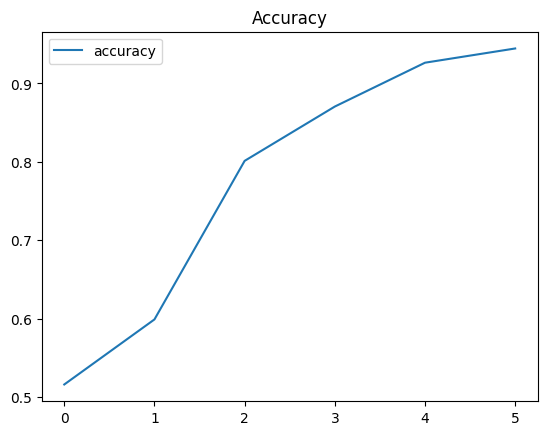

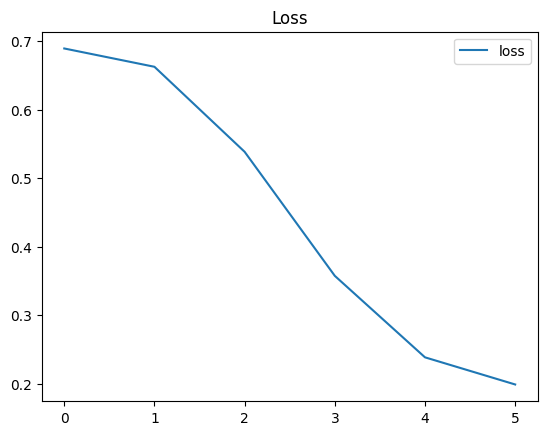

In [14]:
pd.DataFrame(history.history)[['accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss']].plot()
plt.title("Loss")
plt.show()



In [15]:
results = model.evaluate(x_test,y_test)                             # here we get the final accuracy of the model by testing new samples

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.5f}".format(results[1]*100))

15/15 [==============================] - 0s 8ms/step - loss: 0.3460 - accuracy: 0.8782
Test Loss: 0.34597
Test Accuracy: 87.82051


In [16]:
#addin exta
# Predict the label of the test_gen

# Make predictions using your trained CNN model
y_pred = model.predict(x_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)


# Calculate precision, recall, and F1 score
precision = metrics.precision_score(y_test, y_pred_labels, average='weighted')
recall = metrics.recall_score(y_test, y_pred_labels, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred_labels, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:",f1_score)



15/15 [==============================] - 0s 8ms/step
Precision: 0.25
Recall: 0.5
F1 Score: 0.3333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
model.save("/content/gdrive/MyDrive/pneumonia_project/pneumonia_model.h5",model)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [19]:
y_predicted = model.predict(x_test)
y_predicted = np.resize(y_predicted,y_predicted.shape[0])
y_predicted = np.round(y_predicted)

15/15 [==============================] - 0s 9ms/step


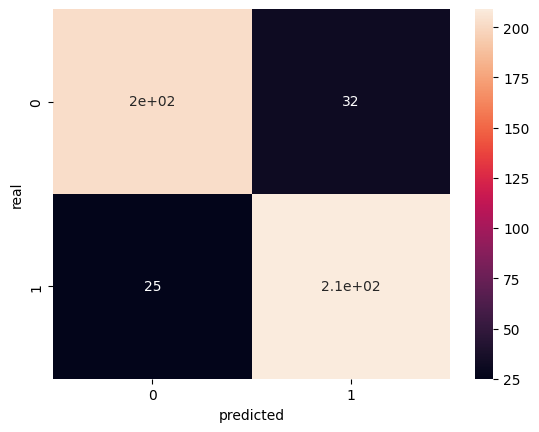

In [20]:
cf_matrix = confusion_matrix(y_test,y_predicted)
sn.heatmap(cf_matrix,annot=True)
plt.xlabel("predicted")
plt.ylabel("real")
plt.show()
# here error in prediction becomes low